In [214]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [215]:
# read data into a DataFrame
data = pd.read_csv('climb_listings.csv', index_col=0)
data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Rented,Date,Source
Address,,,,,,,
239 Brannan Street #14A,South Beach,3,3.0,8650,True,1435734000,Climb SF
18 Lansing Street #306,Rincon Hill,2,2.0,5400,True,1435561200,Climb SF
333 Fremont Street #708,South Beach,2,2.0,5300,True,1435561200,Climb SF
2 Mint Plaza #805,SOMA,1,1.0,4600,True,1435129200,Climb SF
100 Palo Alto Avenue,Clarendon Heights,4,3.5,11000,True,1435129200,Climb SF


In [216]:
data.shape

(336, 7)

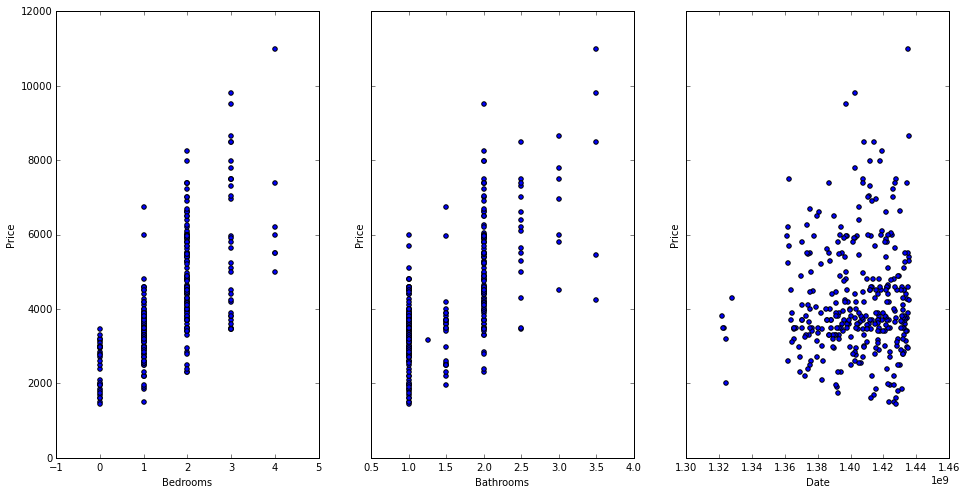

In [217]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Bedrooms', y='Price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Bathrooms', y='Price', ax=axs[1])
data.plot(kind='scatter', x='Date', y='Price', ax=axs[2])

In [218]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Price ~ Bedrooms', data=data).fit()

# print the coefficients
lm.params

Intercept    2384.124609
Bedrooms     1184.576880
dtype: float64

In [219]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Bedrooms': [3]})
X_new.head()

,Bedrooms
0,3


In [220]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 5937.85524903])

In [221]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,2137.177227,2631.071991
Bedrooms,1045.934673,1323.219087


In [222]:
# create a fitted model with all three features
lm = smf.ols(formula='Price ~ Bedrooms + Bathrooms + Date', data=data).fit()

# print the coefficients
lm.params

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 06 Jul 2015   Prob (F-statistic):           4.04e-57
Time:                        21:56:49   Log-Likelihood:                -2805.6
No. Observations:                 336   AIC:                             5619.
Df Residuals:                     332   BIC:                             5635.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8644.1438   3411.321     -2.534      0.012     -1.54e+04 -1933.615
Bedrooms     689.2708     92.633      7.441      0.000       507.050   871.492
Bathrooms   1025.4543    134.201      7.641      0.000       761.463  1289.445
Date         7.28e-06   2.42e-06      3.006      0.003      2.52e-06   1.2e-05
==============================================================================
Omnibus:                       11.006   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               18.407
Skew:                           0.178   Prob(JB):                     0.000101
Kurtosis:                       4.090   Cond. No.                     8.53e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
# create X and y
feature_cols = ['Bedrooms', 'Bathrooms', 'Date']
X = data[feature_cols]
y = data.Price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-8644.14376325
[  6.89270785e+02   1.02545434e+03   7.27951981e-06]


In [224]:
from time import gmtime,mktime

# estimate the rent on a 3-bed, 2-ba apartment today
zip(feature_cols, lm.coef_)
lm.predict([3,2,mktime(gmtime())])

array([ 5929.96092155])

In [225]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Rented,Date,Source,Neighborhood_Bayview,Neighborhood_Berkeley,Neighborhood_Bernal Heights,...,Neighborhood_SOMA,Neighborhood_South Beach,Neighborhood_South Financial District,Neighborhood_Van Ness-Civic Center,Neighborhood_Visitacion Valley,Neighborhood_Walnut Creek,Neighborhood_West Oakland,Neighborhood_Western Addition,Neighborhood_Westwood Park,Neighborhood_Yerba Buena
Address,,,,,,,,,,,,,,,,,,,,,
239 Brannan Street #14A,South Beach,3,3.0,8650,True,1435734000,Climb SF,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18 Lansing Street #306,Rincon Hill,2,2.0,5400,True,1435561200,Climb SF,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333 Fremont Street #708,South Beach,2,2.0,5300,True,1435561200,Climb SF,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2 Mint Plaza #805,SOMA,1,1.0,4600,True,1435129200,Climb SF,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100 Palo Alto Avenue,Clarendon Heights,4,3.5,11000,True,1435129200,Climb SF,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data.columns

Index([u'Neighborhood', u'Bedrooms', u'Bathrooms', u'Price', u'Rented',
       u'Date', u'Source', u'Neighborhood_Bayview', u'Neighborhood_Berkeley',
       u'Neighborhood_Bernal Heights', u'Neighborhood_Buena Vista',
       u'Neighborhood_Candlestick Point', u'Neighborhood_Central Richmond',
       u'Neighborhood_Central Waterfront', u'Neighborhood_Clarendon Heights',
       u'Neighborhood_Cole Valley-Parnassus Heights',
       u'Neighborhood_Diamond Heights', u'Neighborhood_Dogpatch',
       u'Neighborhood_Downtown', u'Neighborhood_Downtown Oakland',
       u'Neighborhood_Downtown San Francisco', u'Neighborhood_Duboce Triangle',
       u'Neighborhood_Emeryville', u'Neighborhood_Eureka Valley',
       u'Neighborhood_Eureka Valley-Dolores Heights',
       u'Neighborhood_Excelsior', u'Neighborhood_Financial District',
       u'Neighborhood_Glen Park', u'Neighborhood_Golden Gate Heights',
       u'Neighborhood_Hayes Valley', u'Neighborhood_Inner Mission',
       u'Neighborhood_Lone Mount

In [227]:
# create X and y
feature_cols = list(set(data.columns) - set(['Price','Source','Neighborhood','Rented']))

X = data[feature_cols]
y = data.Price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('Neighborhood_Buena Vista', -465.07374032182867),
 ('Neighborhood_Nob Hill', 199.06349214808313),
 ('Neighborhood_Lower Pacific Heights', -511.28712527964399),
 ('Neighborhood_Clarendon Heights', 2903.3859509667486),
 ('Neighborhood_Golden Gate Heights', 153.39051961635863),
 ('Neighborhood_Outer Richmond', -790.80683182106952),
 ('Neighborhood_Bernal Heights', -2185.5225416155654),
 ('Neighborhood_Westwood Park', -805.3556788580338),
 ('Neighborhood_Rincon Hill', 465.55393111381125),
 ('Neighborhood_Russian Hill', 678.56625131484475),
 ('Neighborhood_South Beach', 308.34179567845291),
 ('Neighborhood_Eureka Valley', -509.93056167203372),
 ('Neighborhood_Downtown San Francisco', -150.2022992395955),
 ('Neighborhood_North Beach', -150.41509307763698),
 ('Neighborhood_Central Richmond', -730.61756589995775),
 ('Neighborhood_Mission Dolores', 346.52885833402701),
 ('Neighborhood_Excelsior', -723.15488249694386),
 ('Bedrooms', 777.56795793913705),
 ('Neighborhood_Visitacion Valley', -242

In [228]:
# create year dummy variables (because date isn't very intuitive variable)
data["Year"] = pd.DatetimeIndex(pd.to_datetime(data["Date"],unit="s")).to_period('Y')

# create dummy variables using get_dummies, then exclude the first dummy column
year_dummies = pd.get_dummies(data.Year, prefix='Year').iloc[:, :-1]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, year_dummies], axis=1)

data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Rented,Date,Source,Neighborhood_Bayview,Neighborhood_Berkeley,Neighborhood_Bernal Heights,...,Neighborhood_Walnut Creek,Neighborhood_West Oakland,Neighborhood_Western Addition,Neighborhood_Westwood Park,Neighborhood_Yerba Buena,Year,Year_2011,Year_2012,Year_2013,Year_2014
Address,,,,,,,,,,,,,,,,,,,,,
239 Brannan Street #14A,South Beach,3,3.0,8650,True,1435734000,Climb SF,0,0,0,...,0,0,0,0,0,2015,0,0,0,0
18 Lansing Street #306,Rincon Hill,2,2.0,5400,True,1435561200,Climb SF,0,0,0,...,0,0,0,0,0,2015,0,0,0,0
333 Fremont Street #708,South Beach,2,2.0,5300,True,1435561200,Climb SF,0,0,0,...,0,0,0,0,0,2015,0,0,0,0
2 Mint Plaza #805,SOMA,1,1.0,4600,True,1435129200,Climb SF,0,0,0,...,0,0,0,0,0,2015,0,0,0,0
100 Palo Alto Avenue,Clarendon Heights,4,3.5,11000,True,1435129200,Climb SF,0,0,0,...,0,0,0,0,0,2015,0,0,0,0


In [229]:
# create X and y
feature_cols = list(set(data.columns) - set(['Price','Source','Neighborhood','Rented','Year','Date']))

X = data[feature_cols]
y = data.Price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('Neighborhood_Buena Vista', -525.00086672195846),
 ('Neighborhood_Nob Hill', 142.41106828599084),
 ('Neighborhood_Lower Pacific Heights', -602.59146257299096),
 ('Neighborhood_Clarendon Heights', 3004.6538397959157),
 ('Neighborhood_Golden Gate Heights', 143.16178161351934),
 ('Neighborhood_Outer Richmond', -706.83821838646668),
 ('Neighborhood_Bernal Heights', -2120.4030033826966),
 ('Neighborhood_Westwood Park', -774.94315682142849),
 ('Neighborhood_Rincon Hill', 456.27226388828461),
 ('Neighborhood_Russian Hill', 606.67560322976715),
 ('Neighborhood_South Beach', 265.54998485939416),
 ('Neighborhood_Eureka Valley', -565.80687348729066),
 ('Neighborhood_Downtown San Francisco', -194.8586889088821),
 ('Neighborhood_North Beach', -254.62153630124922),
 ('Neighborhood_Central Richmond', -792.71048001331565),
 ('Neighborhood_Mission Dolores', 330.90762164765994),
 ('Neighborhood_Excelsior', -715.0179566439441),
 ('Bedrooms', 774.99913327805154),
 ('Neighborhood_Visitacion Valley', -251

In [230]:
lm.intercept_

2111.4360817257511

In [231]:

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

[]

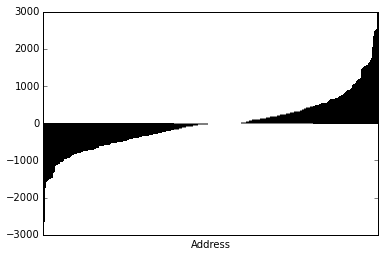

In [232]:
# calculate predictions for the data set and plot errors
predictions = lm.predict(data[feature_cols])
errors = data["Price"]-predictions
errors.name = 'Error'
zip(data.index,data["Price"],predictions,errors)

# visualize the relationship between the features and the response using scatterplots
errors.sort()
errors.plot(kind='bar').get_xaxis().set_ticks([])

In [233]:
pd.concat([data,errors],axis=1).head()

,Neighborhood,Bedrooms,Bathrooms,Price,Rented,Date,Source,Neighborhood_Bayview,Neighborhood_Berkeley,Neighborhood_Bernal Heights,...,Neighborhood_West Oakland,Neighborhood_Western Addition,Neighborhood_Westwood Park,Neighborhood_Yerba Buena,Year,Year_2011,Year_2012,Year_2013,Year_2014,Error
10 Mint Plaza #1,SOMA,2,2.0,8250,True,1419321600,Climb SF,0,0,0,...,0,0,0,0,2014,0,0,0,1,2.962206e+03
100 Palo Alto Avenue,Clarendon Heights,4,3.5,11000,True,1435129200,Climb SF,0,0,0,...,0,0,0,0,2015,0,0,0,0,1.091394e-11
101 Marina Boulevard,Marina,3,3.5,9800,True,1402470000,Climb SF,0,0,0,...,0,0,0,0,2014,0,0,0,1,1.543378e+03
101 Mateo Street,Glen Park,3,1.0,5100,True,1422864000,Climb SF,0,0,0,...,0,0,0,0,2015,0,0,0,0,8.892914e+02
1011 23rd Street #18,Central Waterfront,2,2.5,5500,True,1433401200,Climb SF,0,0,0,...,0,0,0,0,2015,0,0,0,0,2.719245e+02


data size pre categories: 336
data size grouped: 55


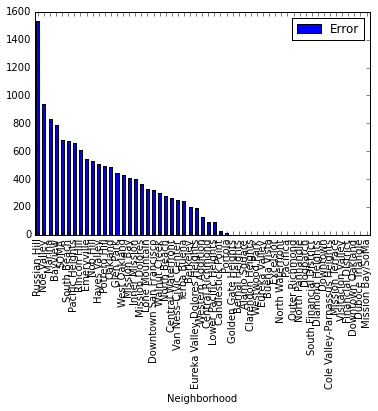

In [234]:
# show errors by neighborhood to see if there are any neighborhoods with funky differences

hooderrors = data[['Neighborhood']]

hooderrors = pd.concat([hooderrors,errors.abs()],axis=1)
print "data size pre categories: " + `len(hooderrors)`

hood_group = hooderrors.groupby('Neighborhood')
print "data size grouped: " + `len(hood_group)`
error_avg = hood_group.mean()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')



data size pre categories: 336
data size grouped: 5


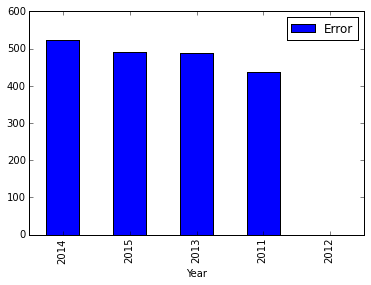

In [235]:
# show errors by year to see if there are any years with funky differences

yearerrors = data[['Year']]

yearerrors = pd.concat([yearerrors,errors.abs()],axis=1)
print "data size pre categories: " + `len(yearerrors)`

year_group = yearerrors.groupby('Year')
print "data size grouped: " + `len(year_group)`
error_avg = year_group.mean()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')




In [236]:
import numpy as np
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((lm.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y))


Residual sum of squares: 507791.95
Variance score: 0.78
